# Statistical Modeling with Python

`statsmodels` is better suited for traditional stats

In [3]:
# the statsmodels.api uses numpy array notation
# statsmodels.formula.api use formula notation (similar to R's formula notation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## A minimal OLS example

Four pairs of points

In [4]:
x = np.array([1,2,3,4])
y = np.array([2,6,4,8])

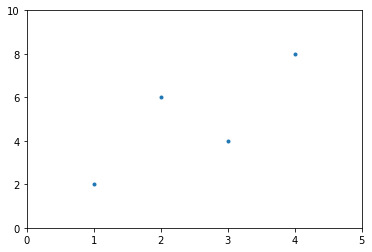

In [5]:
plt.scatter(x,y, marker = '.')
plt.xlim(0,5)
plt.ylim(0,10)
plt.show()

In [6]:
# make a dataframe of our data
d = pd.DataFrame({'x':x, 'y':y})
print(d)

   x  y
0  1  2
1  2  6
2  3  4
3  4  8


Seaborn lmplot

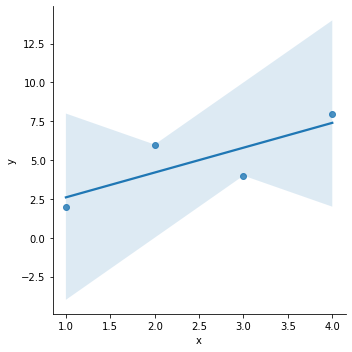

In [7]:
sns.lmplot(x = 'x', y = 'y', data = d)
#recta de regresión

## Formula notation with statsmodels
use statsmodels.formula.api (often imported as smf)

In [8]:
# data is in a dataframe
model = smf.ols('y ~ x', data = d) #co esto se calcula beta 0 beta 1
#qereos saber el modelo qe esta usado esta gráfica

In [9]:
# estimation of coefficients is not done until you call fit() on the model
results = model.fit() #austar, alimentar modelo



In [10]:
#la función summary es muy importante
print(results.summary()) #te regresa la tablita de abajo 

#Model: OLS --> Ordinary Least Squares
#R-squared --> que tan bueno es el modelo qe estamos usando mientras más cerca a 1
#Intercept --> BETA 0 (1.0)
#x --> BETA 1 (1.6)     ##y = 1+1.6x

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Wed, 16 Nov 2022   Prob (F-statistic):              0.200
Time:                        18:02:10   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      2.324      0.430      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Using the abline_plot function for plotting the results

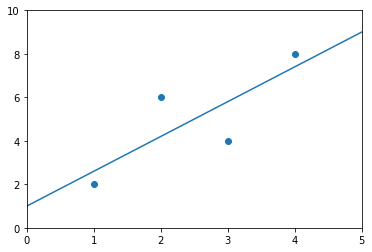

In [11]:
sm.graphics.abline_plot(model_results = results)
plt.scatter(d.x, d.y)

plt.xlim(0,5)
plt.ylim(0,10)

plt.show()

Generating an anova table

(omitir)

In [12]:
print(sm.stats.anova_lm(results))


           df  sum_sq  mean_sq         F  PR(>F)
x         1.0    12.8     12.8  3.555556     0.2
Residual  2.0     7.2      3.6       NaN     NaN


Making predictions

In [13]:
results.predict({'x' : 2})

0    4.2
dtype: float64

## numpy array notation
similar to sklearn's notation

In [14]:
#OTRO METODO PARA HACER LO MISMO MÁS RÁPIDO
print(x)

[1 2 3 4]


In [15]:
X = sm.add_constant(x)  #SIEMPRE PONER ESTO 
# need to add a constant for the intercept term.
# because we are using the numpy notation, we use sm rather than smf

In [16]:
print(X)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$$\mathbf{\hat{Y}} = \boldsymbol{\beta} \mathbf{X}$$


In [17]:
# OLS is capitalized in the numpy notation
model2 = sm.OLS(y, X)  



In [18]:
results2 = model2.fit()


In [19]:
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Wed, 16 Nov 2022   Prob (F-statistic):              0.200
Time:                        18:02:10   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      2.324      0.430      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


## OLS solution

$$(X^TX)^{-1}X^TY$$

(OMITIR)

In [20]:
#TERCER METODO AÚN MÁS FÁCIL
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

In [21]:
np.linalg.inv(X.T @ X) @ (X.T @ y) #libreria de algebra lineal #inv = inversa  #X.T transpuesta de x #@ = multiplicar matrices

array([1. , 1.6])

## Plot Interaction of Categorical Factors

https://www.statsmodels.org/dev/examples/notebooks/generated/categorical_interaction_plot.html

In this example, we will visualize the interaction between categorical factors. First, we will create some categorical data. Then, we will plot it using the interaction_plot function, which internally re-codes the x-factor categories to integers.

In [22]:
# https://stackoverflow.com/questions/55663474/interaction-plot-from-statsmodels-formula-api-using-python
#EJEMPLO

import pandas as pd
from statsmodels.formula.api import ols

Consumption = [51, 52, 53, 54, 56, 57, 55, 56, 58, 59, 62, 63]
Gender  = ["Male", "Male", "Male", "Male", "Male", "Male", "Female",
           "Female", "Female", "Female", "Female", "Female"]
Income = [80, 80, 90, 90, 100, 100, 80, 80, 90, 90, 100, 100] #listas del mismo tamaño

df = pd.DataFrame( {"Consumption": Consumption, "Gender": Gender, "Income": Income}) #hacer data frame
print(df)

    Consumption  Gender  Income
0            51    Male      80
1            52    Male      80
2            53    Male      90
3            54    Male      90
4            56    Male     100
5            57    Male     100
6            55  Female      80
7            56  Female      80
8            58  Female      90
9            59  Female      90
10           62  Female     100
11           63  Female     100


In [23]:
Reg = ols(formula = "Consumption ~ Gender + Income + Gender*Income", data = df) #regresión (~) respecto a gender e income, la primera es la variable responsiba (consumption)
Fit = Reg.fit() #alimentar modelo
Fit.summary()
#un modelo de regresión múltiple es con más coeficientes/variables

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     108.4
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           8.11e-07
Time:                        18:02:10   Log-Likelihood:                -9.9135
No. Observations:                  12   AIC:                             27.83
Df Residuals:                       8   BIC:                             29.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                27.3333      3.059      8.935      0.000      20.279      34.387
Gender[T.Male]            4.0000      4.326      0.925      0.382      -5.976      13.976
Income                    0.3500      0.034     10.340      0.000       0.272       0.428
Gender[T.Male]:Income    -0.1000      0.048     -2.089      0.070      -0.210       0.010
==============================================================================
Omnibus:                        2.522   Durbin-Watson:                   3.273
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                0.970
Skew:                          -0.055   Prob(JB):                        0.616
Kurtosis:                       1.612   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

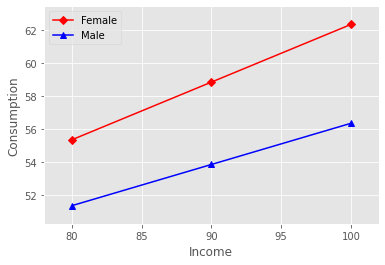

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
plt.style.use('ggplot')

fig = interaction_plot(
   x        = Income,
   trace    = Gender,
   response = Fit.fittedvalues,
   colors   = ['red','blue'],
   markers  = ['D','^'])
plt.xlabel('Income')
plt.ylabel('Consumption')
plt.legend().set_title(None)
plt.show()

###Ejercicios 
1. aumentar 5 datos más 
3. mostrar las tablas summary

In [27]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2,6,4,8,10,12,14,16,18,20])

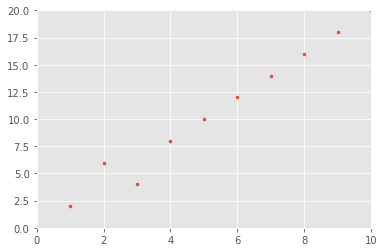

In [29]:
plt.scatter(x,y, marker = '.')
plt.xlim(0,10)
plt.ylim(0,20)
plt.show()

In [30]:
d = pd.DataFrame({'x':x, 'y':y})
print(d)

    x   y
0   1   2
1   2   6
2   3   4
3   4   8
4   5  10
5   6  12
6   7  14
7   8  16
8   9  18
9  10  20


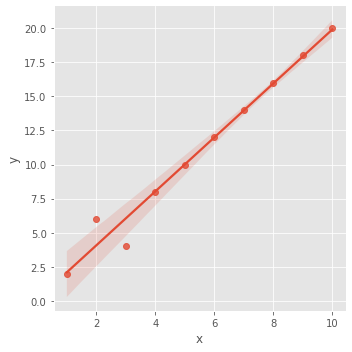

In [31]:
sns.lmplot(x = 'x', y = 'y', data = d)

In [33]:
model = smf.ols('y ~ x', data = d)

In [34]:
results = model.fit()

In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     324.0
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           9.31e-08
Time:                        18:35:55   Log-Likelihood:                -13.043
No. Observations:                  10   AIC:                             30.09
Df Residuals:                       8   BIC:                             30.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1333      0.681      0.196      0.8

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


###Ejercios: 
2. quitar gender*income
3. mostrar las tablas summary

In [36]:
import pandas as pd
from statsmodels.formula.api import ols

Consumption = [51, 52, 53, 54, 56, 57, 55, 56, 58, 59, 62, 63]
Gender  = ["Male", "Male", "Male", "Male", "Male", "Male", "Female",
           "Female", "Female", "Female", "Female", "Female"]
Income = [80, 80, 90, 90, 100, 100, 80, 80, 90, 90, 100, 100] #listas del mismo tamaño

df = pd.DataFrame( {"Consumption": Consumption, "Gender": Gender, "Income": Income}) #hacer data frame
print(df)

    Consumption  Gender  Income
0            51    Male      80
1            52    Male      80
2            53    Male      90
3            54    Male      90
4            56    Male     100
5            57    Male     100
6            55  Female      80
7            56  Female      80
8            58  Female      90
9            59  Female      90
10           62  Female     100
11           63  Female     100


In [37]:
Reg = ols(formula = "Consumption ~ Gender + Income", data = df)
Fit = Reg.fit() 
Fit.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.66e-07
Time:                        18:38:44   Log-Likelihood:                -12.525
No. Observations:                  12   AIC:                             31.05
Df Residuals:                       9   BIC:                             32.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         31.8333      2.546     12.505      0.000      26.075      37.592
Gender[T.Male]    -5.0000      0.458    -10.914      0.000      -6.036      -3.964
Income             0.3000      0.028     10.694      0.000       0.237       0.363
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.503
Skew:                           0.228   Prob(JB):                        0.778
Kurtosis:                       2.107   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""